# Data Preprocessing and Data Cleaning

In [ ]:
#Steps for data preprocessing
#1.INTERPRETE THE DATA
#2.HANDLING MISSING DATA /MISSING VALUES
#3.NORMALIZE DATA
#4.ENCODE THE DATA


In [ ]:
#Preprocessing Task	Columns to Practice On
# Missing value handling-----Age, Cabin, Embarked
# Encoding categorical data	----Sex, Embarked, Pclass
# Feature scaling-----Fare, Age
# Feature engineering----Create family size, title extraction from name
# Outlier detection-----Fare, Age
# Imputation techniques	-----Use median, mean, mode, or ML-based imputations
# Label encoding / One-hot encoding------	Sex, Embarked
# Dropping irrelevant features-----	Ticket, Name, Cabin (optional)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder

# STEP1:Import the data and interprete the data

In [9]:
#Import the data
df=pd.read_csv("D:\\MachineLearning\\Titanic-Dataset.csv")
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Step2:HANDLING MISSING DATA /MISSING VALUES

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#OBSERVATION:: The dataset consists of 12 features,it is of int,float and object type values

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#OBSERVATION: The given data set has null values in Age, Cabin, and Embarked features

In [31]:
# Missing value handling-----Age, Cabin, Embarked
# Age - mean imputation
age_imputer = SimpleImputer(strategy='mean')
df[['Age']] = age_imputer.fit_transform(df[['Age']])

# Embarked - mode imputation
embarked_imputer = SimpleImputer(strategy='most_frequent')
df[['Embarked']] = embarked_imputer.fit_transform(df[['Embarked']])

#Cabin-fill with unknown and extract deck letter
df['Cabin']=df['Cabin'].fillna('Unknown')
#creating a new column named cabin_deck to extract the first letter of the cabin code by using a lambda function
df['Cabin_deck']=df['Cabin'].apply(lambda x: x[0])

#After extracting the first character in the cabin code, we need to encode those letters into binary form 0 and 1, so we use LabelEncoder
label_Encoder=LabelEncoder()
df['cabin_deck_code']=label_Encoder.fit_transform(df['Cabin_deck'])

#df=df.dropduplicates(Cabin,'Cabin_deck')
df




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_deck,cabin_deck_code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S,U,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S,U,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,C,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S,U,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S,U,8
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,B,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S,U,8
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,C,2


In [12]:
#to see all the rows in the df
import pandas as pd
pd.set_option('display.max_rows', None)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [34]:
#to comeback to the normal view 
pd.reset_option('display.max_rows')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_deck,cabin_deck_code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S,U,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S,U,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,C,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S,U,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S,U,8
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,B,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S,U,8
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,C,2


In [50]:
#DROP unwanted features
df.drop(['Cabin','Cabin_deck'],axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin_deck_code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,4
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,6
...,...,...,...,...,...,...,...,...,...,...,...,...
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,S,4
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,S,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1


# Data Transformation:Lable Encoding,One-Hot Encoding

In [52]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'cabin_deck_code'],
      dtype='object')

In [20]:
#Label Encoding
lable_encoder=LabelEncoder()
df['Sex_code']=lable_encoder.fit_transform(df['Sex'])
df['Embarked_code']=lable_encoder.fit_transform(df['Embarked'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Embarked_code
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.530377,1,0,A/5 21171,-0.502445,NaN,S,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.254825,0,0,STON/O2. 3101282,-0.488854,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,1,0,113803,0.420730,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,0.365167,0,0,373450,-0.486337,NaN,S,1,2
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,-0.478116,NaN,Q,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,1.674039,0,0,17463,0.395814,E46,S,1,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,-1.908136,3,1,349909,-0.224083,NaN,S,1,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,-0.185937,0,2,347742,-0.424256,NaN,S,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,-1.081480,1,0,237736,-0.042956,NaN,C,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,-1.770360,1,1,PP 9549,-0.312172,G6,S,0,2


In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Embarked_code
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.530377,1,0,A/5 21171,-0.502445,NaN,S,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.254825,0,0,STON/O2. 3101282,-0.488854,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,1,0,113803,0.420730,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,0.365167,0,0,373450,-0.486337,NaN,S,1,2
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,-0.478116,NaN,Q,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,1.674039,0,0,17463,0.395814,E46,S,1,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,-1.908136,3,1,349909,-0.224083,NaN,S,1,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,-0.185937,0,2,347742,-0.424256,NaN,S,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,-1.081480,1,0,237736,-0.042956,NaN,C,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,-1.770360,1,1,PP 9549,-0.312172,G6,S,0,2


In [64]:
#One-hot Encoding
df = pd.get_dummies(df, columns=['Pclass_1', 'Pclass_2', 'Pclass_3','Sex'], prefix=['Pclass_1', 'Pclass_2', 'Pclass_3','Sex'], dtype=int)
df


,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin_deck_code,Sex_code,Embarked_code,Pclass_1_False,Pclass_1_True,Pclass_2_False,Pclass_2_True,Pclass_3_False,Pclass_3_True,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,8,1,2,1,0,1,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,2,0,0,0,1,1,0,1,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,2,0,2,0,1,1,0,1,0,1,0
6,7,0,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,S,4,1,2,0,1,1,0,1,0,0,1
10,11,1,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,S,6,0,2,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,858,1,"Daly, Mr. Peter Denis",51.0,0,0,113055,26.5500,S,4,1,2,0,1,1,0,1,0,0,1
867,868,0,"Roebling, Mr. Washington Augustus II",31.0,0,0,PC 17590,50.4958,S,0,1,2,0,1,1,0,1,0,0,1
879,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,11767,83.1583,C,2,0,0,0,1,1,0,1,0,1,0
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,S,1,0,2,0,1,1,0,1,0,1,0


In [71]:
df.drop('Embarked',axis=1,inplace=True)
df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,cabin_deck_code,Sex_code,Embarked_code,Pclass_1_False,Pclass_1_True,Pclass_2_False,Pclass_2_True,Pclass_3_False,Pclass_3_True,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,8,1,2,1,0,1,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,0,0,0,1,1,0,1,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,0,2,0,1,1,0,1,0,1,0
6,7,0,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,4,1,2,0,1,1,0,1,0,0,1
10,11,1,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,6,0,2,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,858,1,"Daly, Mr. Peter Denis",51.0,0,0,113055,26.5500,4,1,2,0,1,1,0,1,0,0,1
867,868,0,"Roebling, Mr. Washington Augustus II",31.0,0,0,PC 17590,50.4958,0,1,2,0,1,1,0,1,0,0,1
879,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,11767,83.1583,2,0,0,0,1,1,0,1,0,1,0
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1,0,2,0,1,1,0,1,0,1,0


# # Feature scaling-----Fare, Age

In [22]:
# We do feature scaling for fare and age why because those two are related like if age is above 60,senior citizen fare,if age is under 6,child fare.so we do
#feature scaling for those two features.

from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

# List of columns to scale
cols_to_scale = ['Fare', 'Age']

# Fit and transform the selected columns
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Display first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Embarked_code
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.483866,1,0,A/5 21171,-0.779117,NaN,S,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.205244,0,0,STON/O2. 3101282,-0.729373,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.421653,1,0,113803,2.599828,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,0.421653,0,0,373450,-0.720161,NaN,S,1,2
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,-0.690071,NaN,Q,1,1


# Outliers

In [77]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'cabin_deck_code', 'Sex_code', 'Embarked_code',
       'Pclass_1_False', 'Pclass_1_True', 'Pclass_2_False', 'Pclass_2_True',
       'Pclass_3_False', 'Pclass_3_True', 'Sex_female', 'Sex_male'],
      dtype='object')

In [14]:
import numpy as np
for col in ['Age',  'Fare']:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    iqr=Q3-Q1
    lower_bound=Q1-1.5*iqr
    upper_bound=Q3+1.5*iqr



    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} - Number of outliers: {outliers.shape[0]}")


Age - Number of outliers: 11
Fare - Number of outliers: 116


In [15]:
#Cleaned_data
df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.530377,1,0,A/5 21171,-0.502445,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.254825,0,0,STON/O2. 3101282,-0.488854,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,1,0,113803,0.420730,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.365167,0,0,373450,-0.486337,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,-0.478116,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,1.674039,0,0,17463,0.395814,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,-1.908136,3,1,349909,-0.224083,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,-0.185937,0,2,347742,-0.424256,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,-1.081480,1,0,237736,-0.042956,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,-1.770360,1,1,PP 9549,-0.312172,G6,S


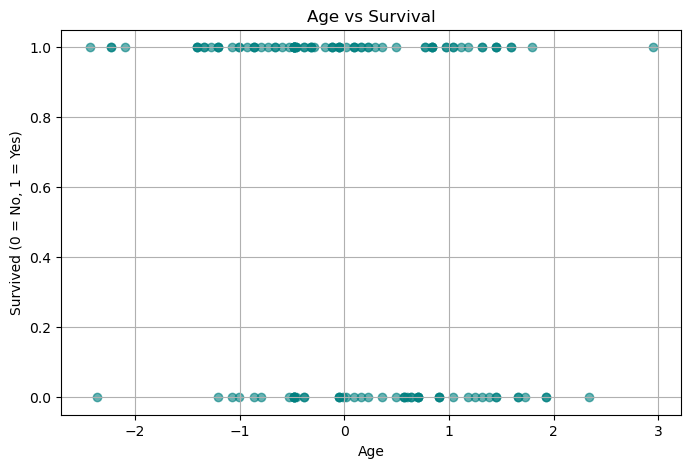

In [82]:
#BOX PLOT
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], df['Survived'], alpha=0.6, c='teal')
plt.xlabel('Age')
plt.ylabel('Survived (0 = No, 1 = Yes)')
plt.title('Age vs Survival')
plt.grid(True)
plt.show()


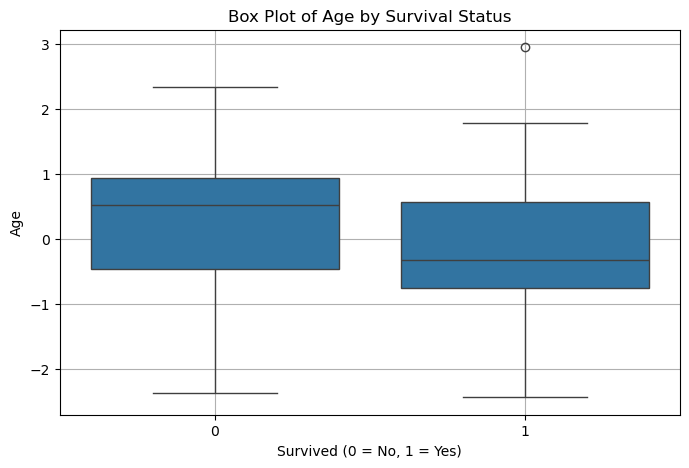

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=df)

plt.title('Box Plot of Age by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.grid(True)
plt.show()


#  Training the Model 

In [23]:

from sklearn.model_selection import train_test_split
import pandas as pd

X = df.drop(['Survived', 'Name', 'Ticket','Sex'], axis=1)  # Input features
y = df['Survived']               # Target column

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)



ValueError: could not convert string to float: 'A36'

# Make predictions and find the accuracy of the model

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


In [ ]:
#Observation:  Model is 71% accurate